In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
from sklearn.preprocessing import StandardScaler, MinMaxScaler, OneHotEncoder
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.svm import SVR
from sklearn.linear_model import LinearRegression, Ridge, Lasso
from sklearn.kernel_ridge import KernelRidge
from sklearn.ensemble import GradientBoostingRegressor
from sklearn import metrics
import scipy.stats as stats
import os
import calendar
from datetime import datetime
import collections

sns.set_style('darkgrid')
sns.set(font_scale=1.5)

# Data Loading

In [3]:
videos_df = pd.read_csv('US_trending.csv')

In [4]:
videos_df.head()

,video_id,title,published_at,channel_id,channel_title,category_id,trending_date,tags,view_count,likes,...,comment_count,thumbnail_link,comments_disabled,ratings_disabled,description,days_in_trending,category_name,publish_to_trend,publishing_hour,publishing_day
0,vPx6M7eTYbc,Spill Your Guts: Harry Styles & Kendall Jenner,2019-12-11 07:08:34,UCJ0uqCI0Vqr2Rrt1HseGirg,The Late Late Show with James Corden,24,2019-12-12,The Late Late Show|Late Late Show|James Corden...,11636632,571835,...,20068,https://i.ytimg.com/vi/vPx6M7eTYbc/default.jpg,False,False,Late Late Show guest host Harry Styles challen...,1,Entertainment,1,7,Wednesday
1,sg8WaeeFyNY,WE GOT UNEXPECTED NEWS..,2019-12-12 05:25:42,UCDSJCBYqL7VQrlXfhr1RtwA,Les Do Makeup,26,2019-12-12,[none],423215,52780,...,13130,https://i.ytimg.com/vi/sg8WaeeFyNY/default.jpg,False,False,Hi babygirls! Thank you so much for watching ...,7,How-to & Style,0,5,Thursday
2,q1PR05q8l2g,"Last To Miss Layup Wins $10,000",2019-12-11 23:00:53,UCQIUhhcmXsu6cN6n3y9-Pww,Jesser,17,2019-12-12,last to leave|nba basketball|nba basketball hi...,463685,20178,...,931,https://i.ytimg.com/vi/q1PR05q8l2g/default.jpg,False,False,"Last to miss the basketball shot wins 10,000!●...",7,Sport,1,23,Wednesday
3,t6Z6RIXq0L0,LAKERS at MAGIC | FULL GAME HIGHLIGHTS | Decem...,2019-12-12 02:35:33,UCWJ2lWNubArHWmf3FIHbfcQ,NBA,17,2019-12-12,sp:ty=high|sp:dt=2019-12-12T00:00:00Z|sp:st=ba...,659579,4605,...,668,https://i.ytimg.com/vi/t6Z6RIXq0L0/default.jpg,False,False,LAKERS at MAGIC | FULL GAME HIGHLIGHTS | Decem...,2,Sport,0,2,Thursday
4,TGDpRB4ovvA,TIPPING DRIVE-THRU WORKERS $100 FOR THE HOLIDA...,2019-12-12 02:38:37,UCtj45MepAoKxZoyR_Mnt86Q,Royal Family,24,2019-12-12,queen Naija|Medicine|Queen|Spicy|Royalty Squad...,175558,18400,...,1907,https://i.ytimg.com/vi/TGDpRB4ovvA/default.jpg,False,False,LAST VIDEO ; https://youtu.be/okujHUu_hmQ*MAKE...,6,Entertainment,0,2,Thursday


### X and y arrays

In [6]:
X = videos_df[['view_count', 'dislikes', 'comment_count', 'category_id']]
y = videos_df['likes']
onehotencoder = OneHotEncoder(categorical_features = [3]) 
X = onehotencoder.fit_transform(X).toarray() 
X.size

C:\Users\Marko\Anaconda3\lib\site-packages\sklearn\preprocessing\_encoders.py:415: FutureWarning: The handling of integer data will change in version 0.22. Currently, the categories are determined based on the range [0, max(values)], while in the future they will be determined based on the unique values.
If you want the future behaviour and silence this warning, you can specify "categories='auto'".
In case you used a LabelEncoder before this OneHotEncoder to convert the categories to integers, then you can now use the OneHotEncoder directly.
  warnings.warn(msg, FutureWarning)
C:\Users\Marko\Anaconda3\lib\site-packages\sklearn\preprocessing\_encoders.py:451: DeprecationWarning: The 'categorical_features' keyword is deprecated in version 0.20 and will be removed in 0.22. You can use the ColumnTransformer instead.
  "use the ColumnTransformer instead.", DeprecationWarning)


38624

### Split data into training and test sets

In [7]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=33)

### Feature Scaling

In [8]:
scaler_X = MinMaxScaler()
X_train = scaler_X.fit_transform(X_train)
X_test = scaler_X.transform(X_test)

#scaler_y = MinMaxScaler()
#y_train = scaler_y.fit_transform(np.array(y_train).reshape(-1, 1))
#y_test = scaler_y.transform(np.array(y_test).reshape(-1, 1))

# Linear regression

In [9]:
lin_reg = LinearRegression()
lin_reg.fit(X_train, y_train)
y_pred = lin_reg.predict(X_test)

In [10]:
print(lin_reg.score(X_test, y_test))

0.8508312205057498


Text(0, 0.5, 'Predicted Y')

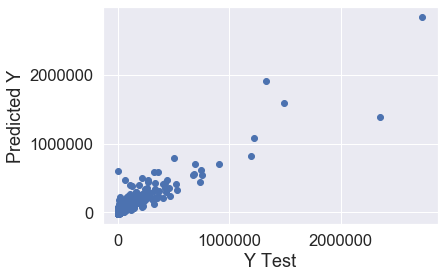

In [11]:
plt.scatter(y_test, y_pred)
plt.xlabel('Y Test')
plt.ylabel('Predicted Y')

In [13]:
print('MAE:', metrics.mean_absolute_error(y_test, y_pred))
print('MSE:', metrics.mean_squared_error(y_test, y_pred))
print('RMSE:', np.sqrt(metrics.mean_squared_error(y_test, y_pred)))
print('R squared on training set: ', lin_reg.score(X_train, y_train))
print('R squared on test set: ', lin_reg.score(X_test, y_test))

MAE: 35498.75513196481
MSE: 5750405222.388563
RMSE: 75831.42635074566
R squared on training set:  0.8511198046113193
R squared on test set:  0.8508312205057498


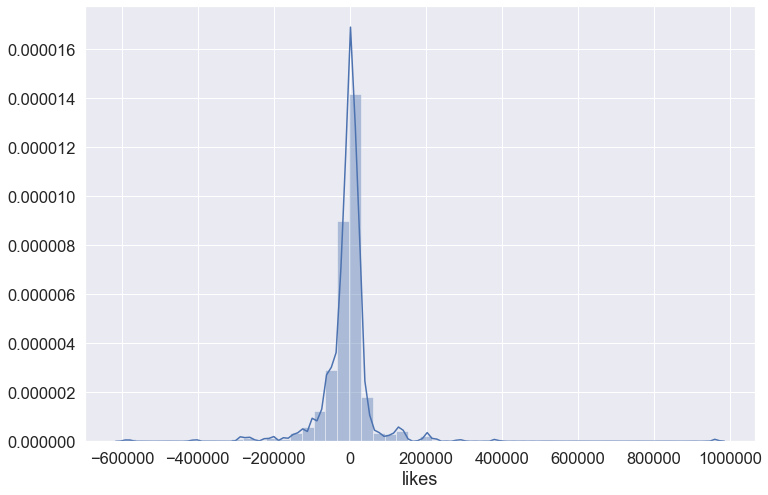

In [14]:
# residual histogram
plt.figure(figsize=(12, 8))
sns.distplot((y_test-y_pred), bins=50);

# Napomena: Rigde i GradientBoosting ce verovatno bolje raditi kad bude vise feature-a

# Ridge regression with Grid Search

In [15]:
ridge_reg = Ridge(solver='cholesky')

In [16]:
parameters = {'alpha': [1e-15, 1e-10, 1e-8, 1e-4, 1e-3, 1e-2, 1, 5, 10, 20]}
ridge_regressor = GridSearchCV(estimator=ridge_reg, param_grid=parameters, cv=5)
ridge_regressor.fit(X_train, y_train)
print(ridge_regressor.best_score_)
print(ridge_regressor.best_estimator_)

C:\Users\Marko\Anaconda3\lib\site-packages\sklearn\linear_model\ridge.py:147: LinAlgWarning: Ill-conditioned matrix (rcond=6.96682e-17): result may not be accurate.
  overwrite_a=True).T
C:\Users\Marko\Anaconda3\lib\site-packages\sklearn\linear_model\ridge.py:147: LinAlgWarning: Ill-conditioned matrix (rcond=6.2024e-18): result may not be accurate.
  overwrite_a=True).T
C:\Users\Marko\Anaconda3\lib\site-packages\sklearn\linear_model\ridge.py:147: LinAlgWarning: Ill-conditioned matrix (rcond=4.46091e-17): result may not be accurate.
  overwrite_a=True).T
C:\Users\Marko\Anaconda3\lib\site-packages\sklearn\linear_model\ridge.py:147: LinAlgWarning: Ill-conditioned matrix (rcond=6.19666e-17): result may not be accurate.
  overwrite_a=True).T


0.6675520710436311
Ridge(alpha=1, copy_X=True, fit_intercept=True, max_iter=None, normalize=False,
      random_state=None, solver='cholesky', tol=0.001)


In [18]:
y_pred = ridge_regressor.predict(X_test)

Text(0, 0.5, 'Predicted Y')

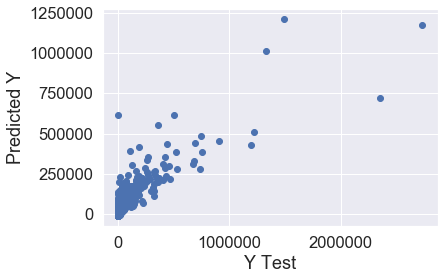

In [19]:
plt.scatter(y_test, y_pred)
plt.xlabel('Y Test')
plt.ylabel('Predicted Y')

In [20]:
print('MAE:', metrics.mean_absolute_error(y_test, y_pred))
print('MSE:', metrics.mean_squared_error(y_test, y_pred))
print('RMSE:', np.sqrt(metrics.mean_squared_error(y_test, y_pred)))
print('R squared on training set: ', ridge_regressor.score(X_train, y_train))
print('R squared on test set: ', ridge_regressor.score(X_test, y_test))

MAE: 45558.534342172185
MSE: 13967319864.533958
RMSE: 118183.41619928728
R squared on training set:  0.7077397829746359
R squared on test set:  0.6376797849155922


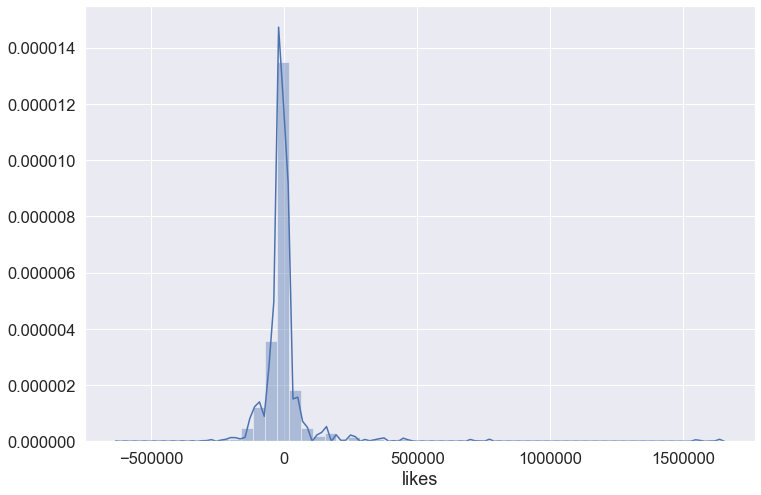

In [21]:
# residual histogram
plt.figure(figsize=(12, 8))
sns.distplot((y_test-y_pred), bins=50);

# Gradient Boosting regression with Grid Search

In [22]:
grad_boost_reg = GradientBoostingRegressor()

In [23]:
parameters = {#'learning_rate': [0.1, 0.2, 0.3],
              'subsample': [0.9, 0.5, 0.2],
              'n_estimators': [50, 100, 1000, 1000],
              #'max_depth': [4, 6, 8],
              'alpha': [1e-15, 1e-10, 1e-8, 1e-4, 1e-3, 1e-2]}
grid = GridSearchCV(estimator=grad_boost_reg, param_grid=parameters, cv=5)
grid.fit(X_train, y_train)
print(grid.best_score_)
print(grid.best_estimator_)

0.7745310828822229
GradientBoostingRegressor(alpha=0.001, criterion='friedman_mse', init=None,
                          learning_rate=0.1, loss='ls', max_depth=3,
                          max_features=None, max_leaf_nodes=None,
                          min_impurity_decrease=0.0, min_impurity_split=None,
                          min_samples_leaf=1, min_samples_split=2,
                          min_weight_fraction_leaf=0.0, n_estimators=50,
                          n_iter_no_change=None, presort='auto',
                          random_state=None, subsample=0.2, tol=0.0001,
                          validation_fraction=0.1, verbose=0, warm_start=False)


In [24]:
y_pred = grid.predict(X_test)

Text(0, 0.5, 'Predicted Y')

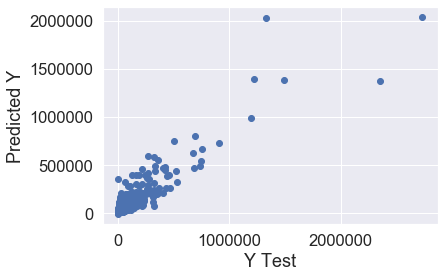

In [25]:
plt.scatter(y_test, y_pred)
plt.xlabel('Y Test')
plt.ylabel('Predicted Y')

In [26]:
print('MAE:', metrics.mean_absolute_error(y_test, y_pred))
print('MSE:', metrics.mean_squared_error(y_test, y_pred))
print('RMSE:', np.sqrt(metrics.mean_squared_error(y_test, y_pred)))
print('R squared on training set: ', grid.score(X_train, y_train))
print('R squared on test set: ', grid.score(X_test, y_test))

MAE: 33854.12866628859
MSE: 5975635446.077859
RMSE: 77302.23441840384
R squared on training set:  0.8996346406327194
R squared on test set:  0.8449886205021637


# Support Vector Regression with Grid Search

In [27]:
svr = SVR()

In [28]:
parameters = {'kernel': ('linear', 'rbf','poly'), 
              'C': [1e0, 1e1, 1e2, 1e3],
              'gamma': np.logspace(-2, 2, 5),
              'epsilon':[0.1,0.2,0.5,0.3]}
svr_regressor = GridSearchCV(estimator=svr, param_grid=parameters, cv=5)
svr_regressor.fit(X_train, y_train)
print(svr_regressor.best_score_)
print(svr_regressor.best_estimator_)

0.7907470170332421
SVR(C=10.0, cache_size=200, coef0=0.0, degree=3, epsilon=0.5, gamma=100.0,
    kernel='poly', max_iter=-1, shrinking=True, tol=0.001, verbose=False)


In [29]:
y_pred = svr_regressor.predict(X_test)

Text(0, 0.5, 'Predicted Y')

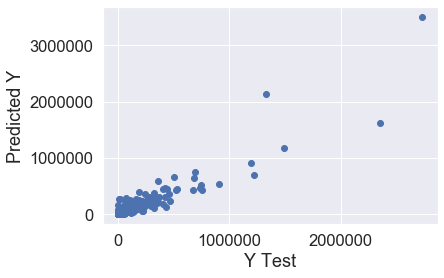

In [30]:
plt.scatter(y_test, y_pred)
plt.xlabel('Y Test')
plt.ylabel('Predicted Y')

In [31]:
print('MAE:', metrics.mean_absolute_error(y_test, y_pred))
print('MSE:', metrics.mean_squared_error(y_test, y_pred))
print('RMSE:', np.sqrt(metrics.mean_squared_error(y_test, y_pred)))
print('R squared on training set: ', svr_regressor.score(X_train, y_train))
print('R squared on test set: ', svr_regressor.score(X_test, y_test))

MAE: 29113.238098520796
MSE: 5810807039.363032
RMSE: 76228.64972805849
R squared on training set:  0.8792488368218179
R squared on test set:  0.8492643630463422


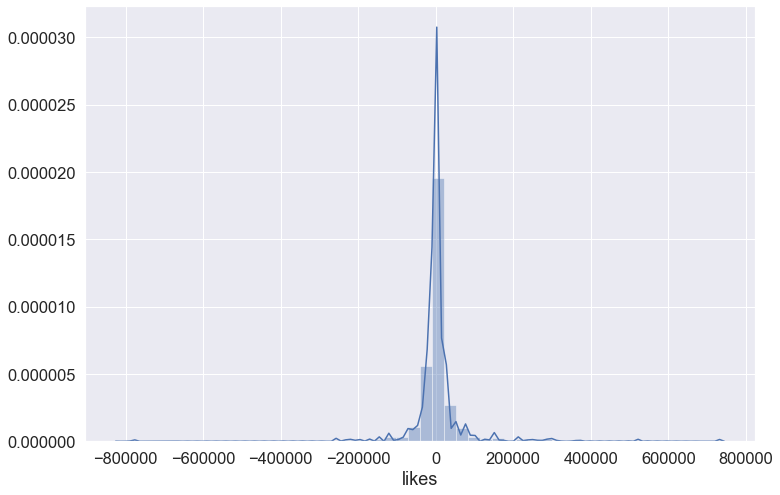

In [32]:
# residual histogram
plt.figure(figsize=(12, 8))
sns.distplot((y_test-y_pred), bins=50);

# Kernel Ridge Regression with Grid Search

In [33]:
kernel_ridge = KernelRidge()

In [34]:
parameters = {'kernel': ('linear', 'rbf','poly'), 
              'alpha': [1e0, 0.1, 1e-2, 1e-3],
              'gamma': np.logspace(-2, 2, 5)}
krr_regressor = GridSearchCV(estimator=kernel_ridge, param_grid=parameters, cv=5)
krr_regressor.fit(X_train, y_train)
print(krr_regressor.best_score_)
print(krr_regressor.best_estimator_)

0.8325905412211837
KernelRidge(alpha=0.01, coef0=1, degree=3, gamma=1.0, kernel='poly',
            kernel_params=None)


In [35]:
y_pred = krr_regressor.predict(X_test)

Text(0, 0.5, 'Predicted Y')

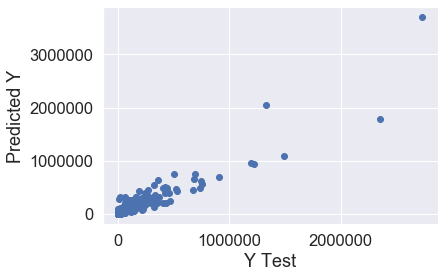

In [36]:
plt.scatter(y_test, y_pred)
plt.xlabel('Y Test')
plt.ylabel('Predicted Y')

In [37]:
print('MAE:', metrics.mean_absolute_error(y_test, y_pred))
print('MSE:', metrics.mean_squared_error(y_test, y_pred))
print('RMSE:', np.sqrt(metrics.mean_squared_error(y_test, y_pred)))
print('R squared on training set: ', krr_regressor.score(X_train, y_train))
print('R squared on test set: ', krr_regressor.score(X_test, y_test))

MAE: 30618.719049322033
MSE: 5569706885.213021
RMSE: 74630.4688797613
R squared on training set:  0.9039254602604572
R squared on test set:  0.8555186380651545


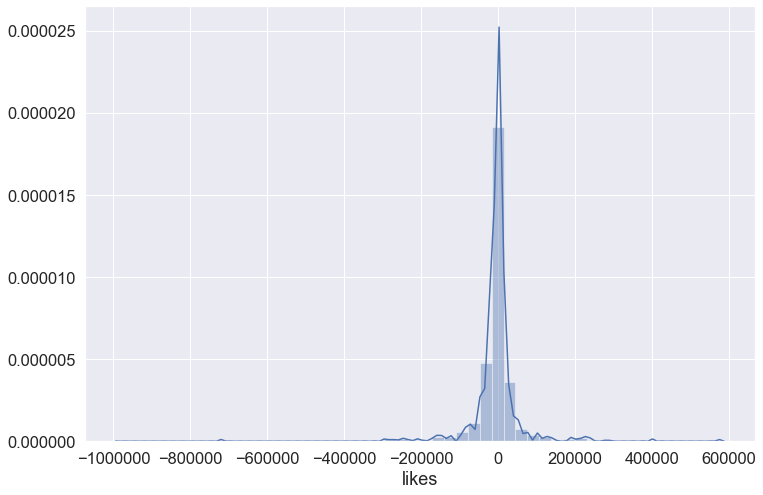

In [38]:
# residual histogram
plt.figure(figsize=(12, 8))
sns.distplot((y_test-y_pred), bins=50);